In [1]:
import math
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.size'] = 24

In [3]:
df_filtered = pd.read_csv('datasets/filtered_dataset_gas.csv')

In [4]:
df_routes_london = gpd.read_file('datasets/routes_london.shp')

In [5]:
df_routes_london = df_routes_london.to_crs(epsg=3857)

In [6]:
def transform_lat(lat):
    y = math.log(math.tan((90 + lat) * np.pi / 360)) / (np.pi / 180)
    y = y * 20037508.34 / 180
    return y
def transform_lon(lon):
    x = lon * 20037508.34 / 180
    return x

In [8]:
def plot_bar_graph(criteria, alternatives):
    x = np.arange(len(criteria))
    fig, ax = plt.subplots()
    barplot = ax.bar(x, criteria, hatch='x')
    ax.set_xticks(x)
    ax.set_ylabel(alternatives, size=27)
    ax.set_xlabel('Alternativas', size=17)
    plt.grid(axis='y', linestyle='dashed', linewidth=1, color='black')
    plt.show()
    fig.savefig(f'graphs/alternatives/{alternatives}.pdf')

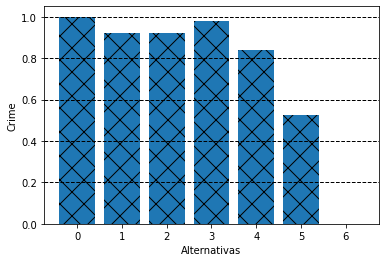

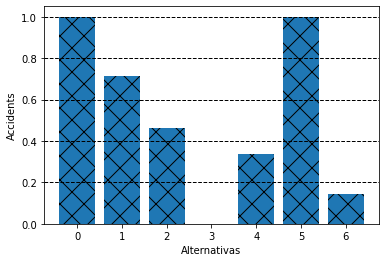

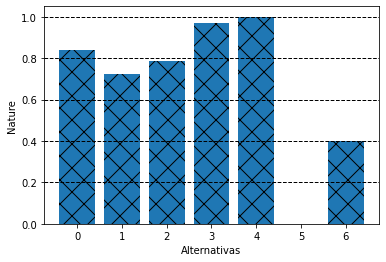

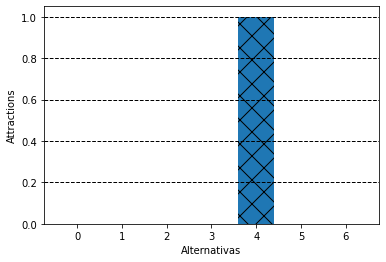

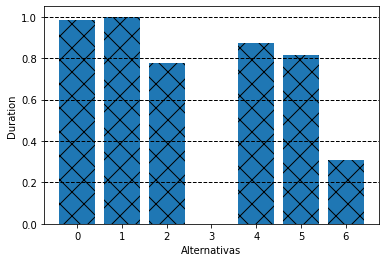

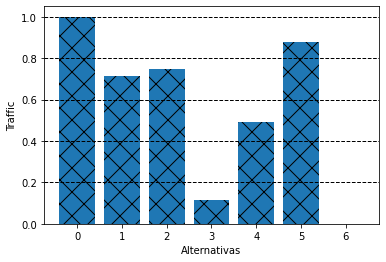

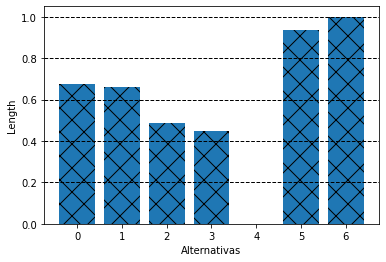

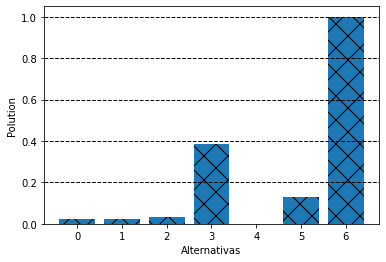

In [9]:
#criteria_labels = ['Criminalidade', 'Acidentes', 'Natureza', 'Atrações', 
#    'Duração','Tráfego','Comprimento','Poluição']    

criteria_labels = ['Crime', 'Accidents', 'Nature', 'Attractions', 
    'Duration','Traffic','Length','Polution'] 

labels =  ['crimeNorm',	'accidentNorm','natureNorm'	,'attractionNorm','durationNorm' ,'trafficNorm'	,'lengthNorm' ,'polutionNorm']

for criteria, label in zip(criteria_labels, labels):
    plot_bar_graph(df_filtered[df_filtered['setID'] == 56][label], alternatives=criteria)

In [29]:
def plot_criteria(criteria):
    df_data = df_routes_london[df_routes_london['setID'] == 56]
    fig, axs = plt.subplots(figsize=(20,5))
    df_data.plot(ax=axs, column=criteria, cmap='viridis',zorder=999, markersize=2, legend=True, alpha=1)
    axs.scatter(1826.75,6699027.13)
    axs.text(1826.75,6699027.13, 'Begin', fontsize=24)
    axs.scatter(11178.035346959778, 6700932.053165021)
    axs.text(11178.035346959778, 6700932.053165021, 'End', fontsize=24)
    axs.set_yticks([])
    cx.add_basemap(axs)
    axs.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    fig.tight_layout()
    axs.figure.savefig(f'graphs/heatmaps/heatmap_path_{criteria}.pdf')

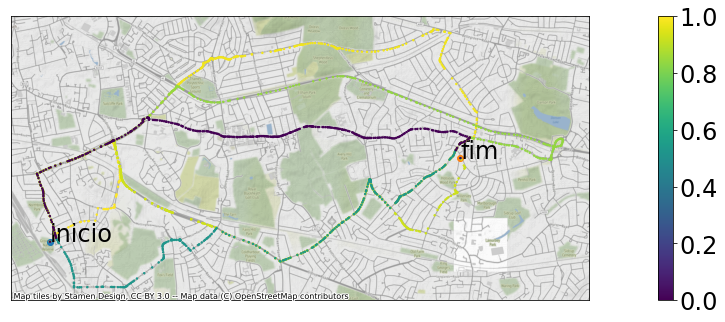

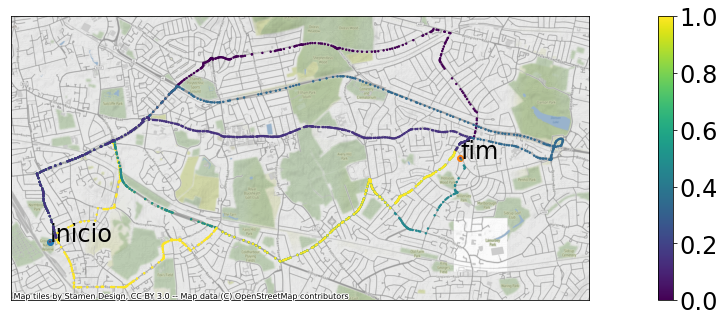

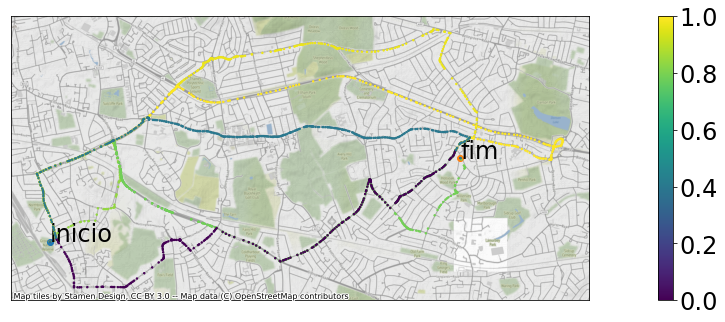

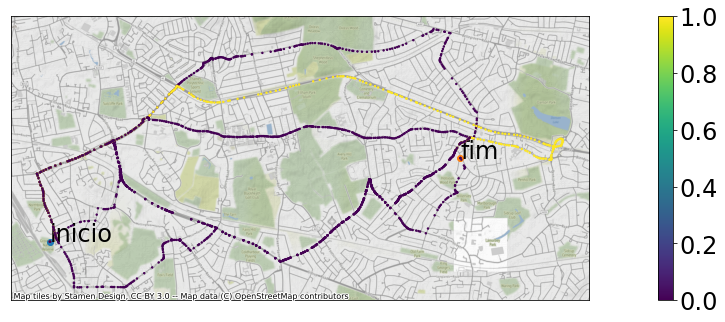

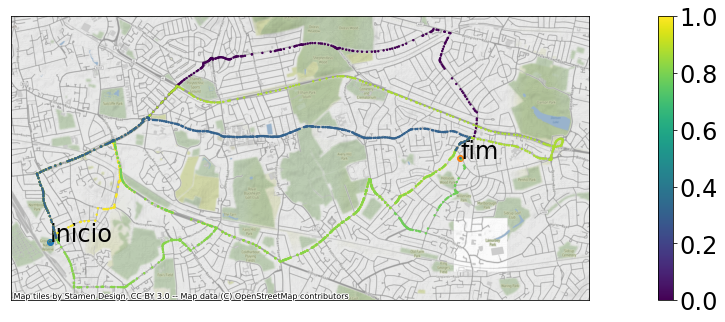

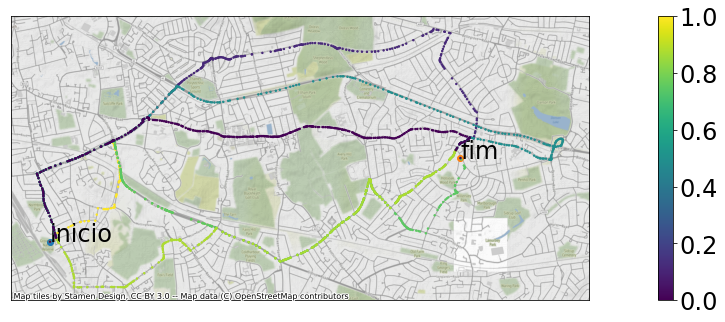

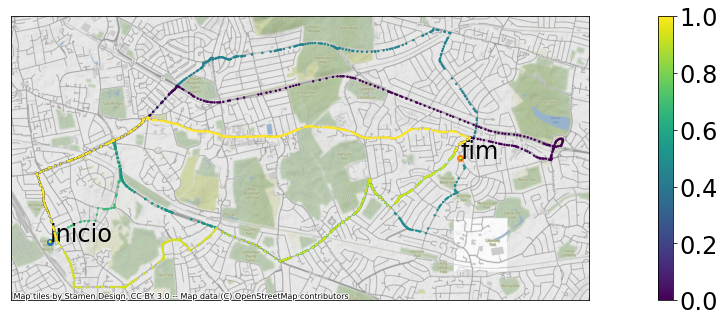

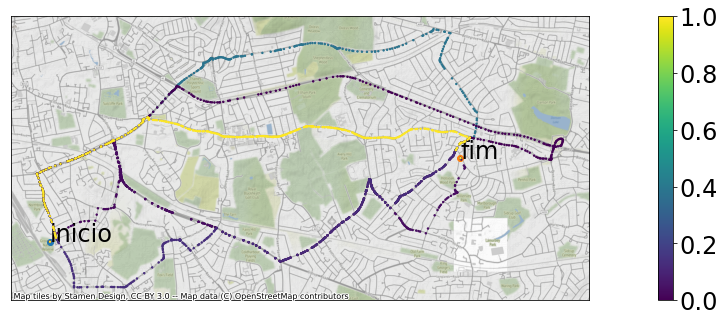

In [30]:
criterias= ['crimeNorm', 'accidentNo', 'natureNorm', 'attracti_1', 'durationNo', 
    'trafficNor', 'lengthNorm', 'polutionNo']    
for criteria in criterias:
    plot_criteria(criteria)